In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [82]:
data_train_path='C:\Users\oki\CaisseAutomatiqueIntelligente\moneyClassification\train'
data_test_path='C:\Users\oki\CaisseAutomatiqueIntelligente\moneyClassification\test'
data_val_path='C:\Users\oki\CaisseAutomatiqueIntelligente\moneyClassification\validation'

In [83]:
img_width=180
img_height=180

In [84]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False)


Found 141 files belonging to 4 classes.


In [85]:
data_cat=data_train.class_names

In [86]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False)


Found 18 files belonging to 4 classes.


In [87]:
data_test=tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False)


Found 141 files belonging to 4 classes.


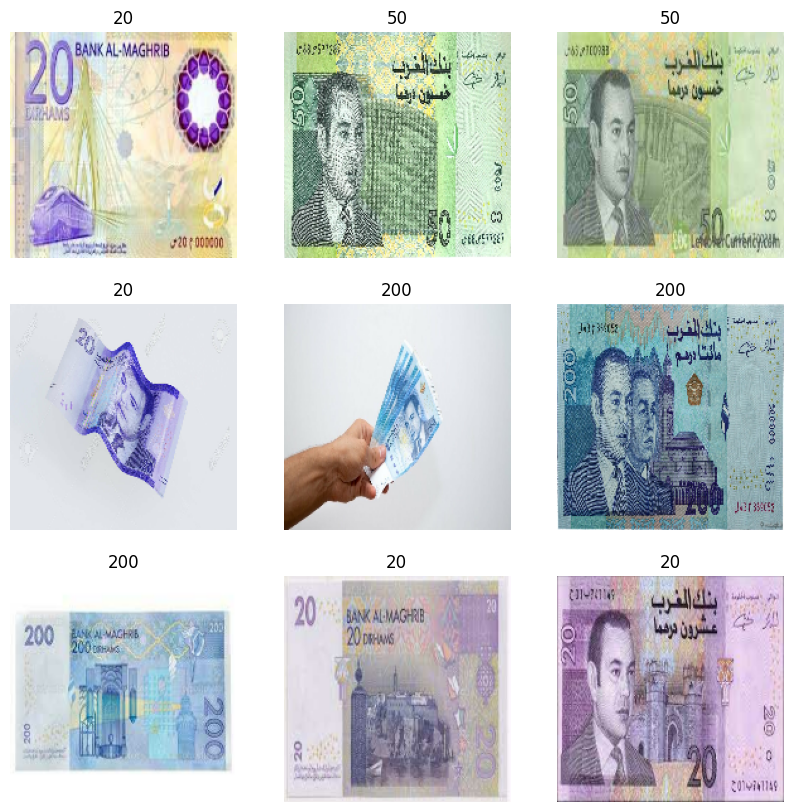

In [88]:
plt.figure(figsize=(10,10))
for image ,labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')

In [89]:
from tensorflow.keras.models import Sequential

In [90]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [100]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [101]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [102]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32)

Epoch 1/25
5/5 [==============================] - 6s 825ms/step - loss: 5.0321 - accuracy: 0.2199 - val_loss: 1.5814 - val_accuracy: 0.3333
Epoch 2/25
5/5 [==============================] - 7s 967ms/step - loss: 1.4919 - accuracy: 0.2908 - val_loss: 1.2394 - val_accuracy: 0.2778
Epoch 3/25
5/5 [==============================] - 5s 763ms/step - loss: 1.2466 - accuracy: 0.4610 - val_loss: 0.9763 - val_accuracy: 0.8333
Epoch 4/25
5/5 [==============================] - 6s 1s/step - loss: 1.0046 - accuracy: 0.7518 - val_loss: 0.8509 - val_accuracy: 0.4444
Epoch 5/25
5/5 [==============================] - 5s 777ms/step - loss: 0.7441 - accuracy: 0.7021 - val_loss: 0.6417 - val_accuracy: 0.6667
Epoch 6/25
5/5 [==============================] - 7s 1s/step - loss: 0.6422 - accuracy: 0.7518 - val_loss: 0.4636 - val_accuracy: 0.8333
Epoch 7/25
5/5 [==============================] - 5s 773ms/step - loss: 0.4164 - accuracy: 0.8440 - val_loss: 0.3545 - val_accuracy: 0.7778
Epoch 8/25
5/5 [==========

Text(0.5, 1.0, 'Loss')

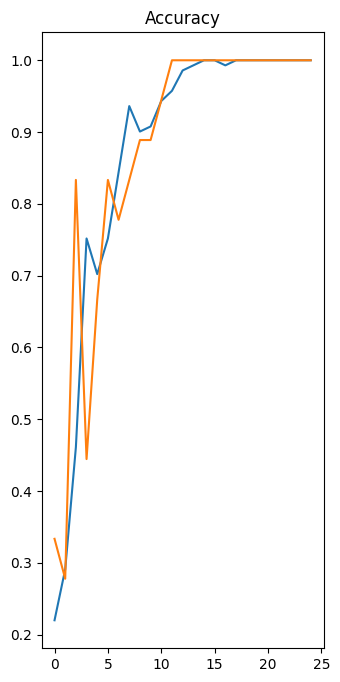

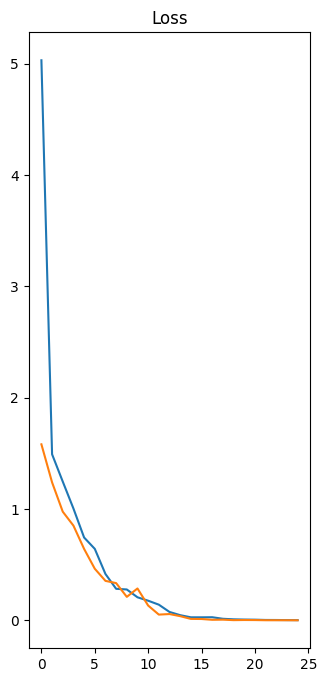

In [103]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')


# Test

In [104]:
image='/content/drive/MyDrive/dataset_money_counter/test/50/63a4f0bbf17191.90529221-original.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


In [105]:
predict=model.predict(img_bat)

1/1 [==============================] - 0s 102ms/step


In [106]:
score=tf.nn.softmax(predict)

In [107]:
print('This paper is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))


This paper is 50 with accuracy of 100.00
